Figure 4: MLD Poster Stamps

In [23]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
#from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw


Populating the interactive namespace from numpy and matplotlib


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc'
vgrid_file ='/g/data/v45/pas561/mom/archive/wombat_jun16z/output1981/ocean__1980_07.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print geolon_t.shape

fh=fcor/ht
print fh.shape

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print st_ocean.shape
print potrho.shape
print yt_ocean.shape


(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [25]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.11.0


In [21]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
print Ocean_File
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print cntrl.mld.shape


Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print Ocean_File
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print pert.mld.shape

/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/output*/ocean__*.nc
(50, 1080, 1440)
/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/output*/ocean__*.nc
(44, 1080, 1440)


In [26]:
#NaN the land values for masking
#yr=0
#tst=cntrl_i.CN[yr*12+i,:,:].sum('ct').load()
#print tst.shape
#print 'tst', tst[50:150,1276]

#mask area_t for land cells.
msk=np.zeros((kmt.shape[0],kmt.shape[1]),dtype=float)
msk.fill(np.nan)
msk[np.where(kmt>=1)]=1
#print msk.shape
#tst=tst*msk
#print 'tst', tst[50:150,1276]




b) MOM025_NoNP
1973


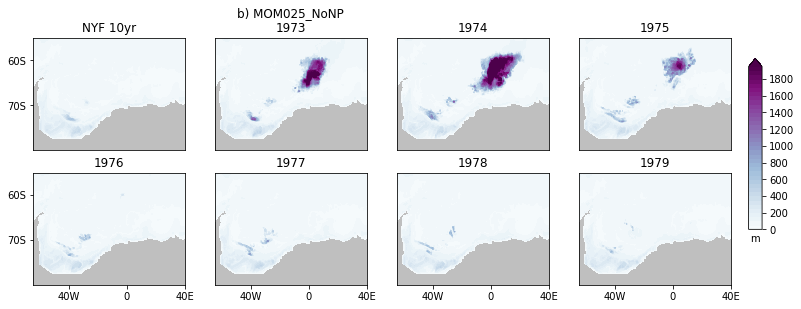

In [23]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')
clev = np.arange(0,2000,50)
yrs=np.arange(1972,2018,1)

numyrs=8

for yr in range(0,numyrs):
       
    #print yr*12+i
    
    plt.subplot(4,4,yr+1)
    plt.gca().patch.set_color('.75')
        
    if yr==0:
        p1=plt.contourf(xt_ocean,yt_ocean,cntrl.mld[0:9,:,:].mean('Time').load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(xt_ocean,yt_ocean,pert.mld[yr,:,:].load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('NYF 10yr')
    elif yr==1:
        titstr='b) MOM025_NoNP\n'+str(yrs[yr])
        print titstr
        plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
    
    plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
    #if yr==0 | yr == 4 | yr == 8 | yr == 12:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        plt.gca().axes.set_yticklabels(['70S', '60S'])
        
ax3 = plt.axes([0.92,0.6,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m')

of = '/g/data/v45/pas561/mom/archive/wp2_figs/MLDb.png'
plt.savefig(of,dpi=220)

In [27]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

Ocean_File = os.path.join(NYFCntrlDir,'Tdim_output197*/ocean__*.nc')
print Ocean_File
cntrl_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print cntrl_np.mld.shape

#Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
#print Ocean_File
#cntrl2_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print cntrl2_np.mld.shape


Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print Ocean_File
pert_np=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print pert_np.mld.shape

/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output197*/ocean__*.nc
(9, 1080, 1440)
/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/output*/ocean__*.nc
(51, 1080, 1440)


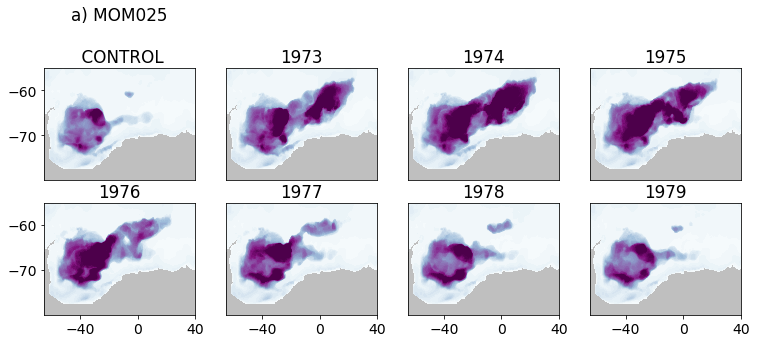

In [28]:
fontsize=14
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')
clev = np.arange(0,2000,50)
yrs=np.arange(1972,2018,1)

numyrs=8

for yr in range(0,numyrs):
       
    #print yr*12+i
    
    plt.subplot(4,4,yr+1)
    plt.gca().patch.set_color('.75')
        
    if yr==0:
        p1=plt.contourf(xt_ocean,yt_ocean,cntrl_np.mld[0:9,:,:].mean('time').load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(xt_ocean,yt_ocean,pert_np.mld[yr,:,:].load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('a) MOM025\n\n CONTROL')
    #elif yr==1:
    #    titstr='a) MOM025\n'+str(yrs[yr])
    #    print titstr
    #    plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        #plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
       
    plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        #plt.gca().axes.set_yticklabels(['70S', '60S'])
    #else:
        #plt.gca().axes.get_yaxis().set_ticks([])
            

ax3 = plt.axes([0.92,0.6,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('m')
cb.remove()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/MLDa.png'
plt.savefig(of,dpi=220)


In [7]:
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

#plot stamps of sea ice concentration.
Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean.nc')
cntrl_01=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print cntrl_01.mld.shape

Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
pert_01=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print pert_01.mld.shape

vgrid_file ='/g/data3/hh5/tmp/pas561/kds75_cp/output430/ocean.nc'


nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean_01 = nc.variables['yt_ocean'][:]
xt_ocean_01 = nc.variables['xt_ocean'][:]
#potrho = nc.variables['potrho'][:]
#dzt = nc.variables['dzt'][:]
nc.close() # close the file
print yt_ocean_01.shape

IOError: no files to open

In [14]:
# Extract the variables
hgrid_file ='/g/data/v45/pas561/mom/archive/mom01_unmasked_ocean_grid.nc'
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
kmt = nc.variables['kmt'][:]
nc.close() # close the file
print kmt.shape

#NaN the land values for masking
#yr=0
#tst=cntrl_i.CN[yr*12+i,:,:].sum('ct').load()
#print tst.shape
#print 'tst', tst[50:150,1276]

#mask area_t for land cells.
msk_01=np.zeros((kmt.shape[0],kmt.shape[1]),dtype=float)
msk_01.fill(np.nan)
msk_01[np.where(kmt>=1)]=1
#print msk.shape
#tst=tst*msk
#print 'tst', tst[50:150,1276]

(2700, 3600)


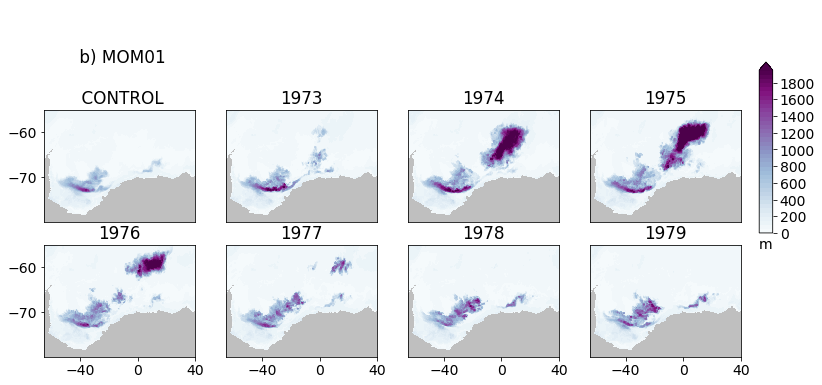

In [32]:
fontsize=14
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')
clev = np.arange(0,2000,50)
yrs=np.arange(1972,2018,1)

numyrs=8

for yr in range(0,numyrs):
       
    #print yr*12+i
    if yr==0:
        #first year is only 9 months ... use first 3 months of next year
        t1=3
        t2=27
    elif yr==1:
        #first year is only 9 months ... use first 3 months of next year
        t1=0
        t2=4
    elif yr==2:
        t1=3
        t2=7
    else:
        t1=t2
        t2=t2+4
        
    plt.subplot(4,4,yr+1)
    plt.gca().patch.set_color('.75')
        
    if yr==0:
        p1=plt.contourf(xt_ocean_01,yt_ocean_01,cntrl_01.mld[t1:t2,:,:].mean('time').load()*msk_01,cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(xt_ocean_01,yt_ocean_01,pert_01.mld[t1:t2,:,:].mean('time').load()*msk_01,cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('\n\n b) MOM01\n\n CONTROL')
    #elif yr==1:
    #    titstr='b) MOM01\n'+str(yrs[yr])
    #    print titstr
    #    plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        #plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
       
    plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        #plt.xlabel('Latitude ($^\circ$)')
        #plt.gca().axes.set_yticklabels(['70S', '60S'])
    #else:
        #plt.gca().axes.get_yaxis().set_ticks([])
                        
ax3 = plt.axes([0.92,0.7,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m')

of = '/g/data/v45/pas561/mom/archive/wp2_figs/MLDc.png'
plt.savefig(of,dpi=220)


In [29]:
Ocean_File = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_1*.nc'
print Ocean_File
mom01_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print mom01_pert.mld.shape


/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_1*.nc
(41, 1351, 3600)


In [30]:
Ocean_File = '/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_1*.nc'
print Ocean_File
mom01_control=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print mom01_control.mld.shape


/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_1*.nc
(42, 1351, 3600)


In [31]:
print mom01_control.yt_ocean.shape
print mom01_control.xt_ocean.shape
print msk_01.shape

(1351,)
(3600,)
(2700, 3600)


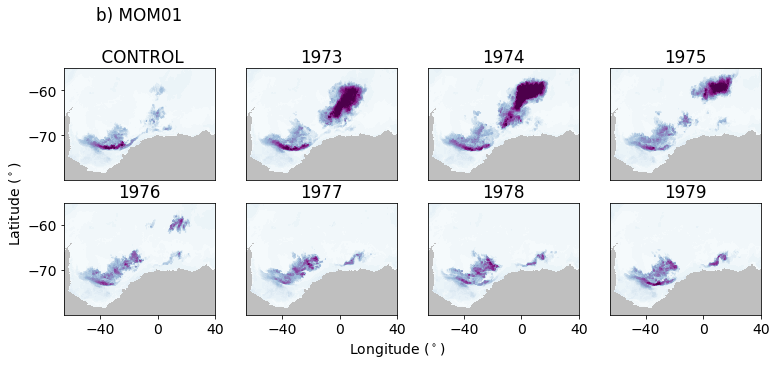

In [44]:
fontsize=14
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('b) MOM025_NoNP')
clev = np.arange(0,2000,50)
yrs=np.arange(1972,2018,1)

numyrs=8

for yr in range(0,numyrs):
       
    #print yr*12+i
    
    plt.subplot(4,4,yr+1)
    plt.gca().patch.set_color('.75')
        
    if yr==0:
        p1=plt.contourf(mom01_control.xt_ocean,mom01_control.yt_ocean,mom01_cntrl.mld[0:1,:,:].mean('time').load()*msk_01[0:1351,:],cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(mom01_control.xt_ocean,mom01_control.yt_ocean,mom01_pert.mld[yr,:,:].load()*msk_01[0:1351,:],cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('b) MOM01\n\n CONTROL')
    #elif yr==1:
    #    titstr='a) MOM025\n'+str(yrs[yr])
    #    print titstr
    #    plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        #plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
       
    plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        #plt.gca().axes.set_yticklabels(['70S', '60S'])
    #else:
        #plt.gca().axes.get_yaxis().set_ticks([])
    
    if yr in {5}:
       plt.xlabel('Longitude ($^\circ$)',x=1)
    if yr in {4}:
       plt.ylabel('Latitude ($^\circ$)',y=1)
                

ax3 = plt.axes([0.92,0.6,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('m')

cb.remove()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/MLDb.png'
#plt.savefig(of,dpi=220)


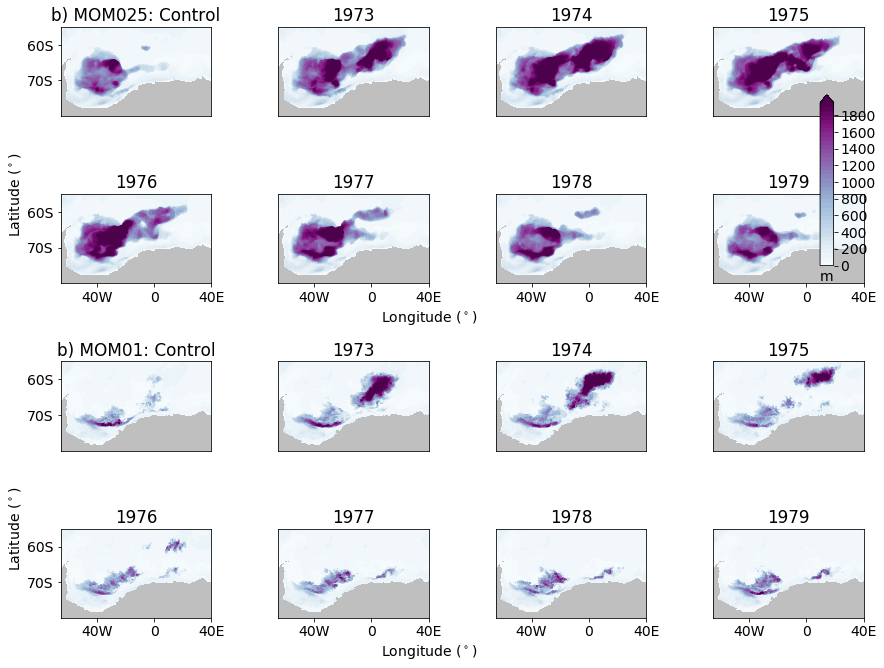

In [45]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#plt.suptitle('b) MOM025_NoNP')
clev = np.arange(0,2000,50)
yrs=np.arange(1972,2018,1)

numyrs=8

for yr in range(0,numyrs):
       
    #print yr*12+i
    
    plt.subplot(4,4,yr+1)
    plt.gca().patch.set_color('.75')
        
    if yr==0:
        p1=plt.contourf(xt_ocean,yt_ocean,cntrl_np.mld[0:9,:,:].mean('time').load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(xt_ocean,yt_ocean,pert_np.mld[yr,:,:].load()*msk,cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('b) MOM025: Control')
    #elif yr==1:
    #    titstr='a) MOM025\n'+str(yrs[yr])
    #    print titstr
    #    plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
       
    #plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        plt.gca().axes.set_yticklabels(['70S', '60S'])
    else:
        plt.gca().axes.get_yaxis().set_ticks([])

    if yr in {5}:
       plt.xlabel('Longitude ($^\circ$)',x=1)
    if yr in {4}:
       plt.ylabel('Latitude ($^\circ$)',y=1)


for yr in range(0,numyrs):
        
    plt.subplot(4,4,yr+9)
    plt.gca().patch.set_color('.75')

    if yr==0:
        p1=plt.contourf(mom01_control.xt_ocean,mom01_control.yt_ocean,mom01_cntrl.mld[0:1,:,:].mean('time').load()*msk_01[0:1351,:],cmap=plt.cm.BuPu,levels=clev,extend='max')
    else:
        p1=plt.contourf(mom01_control.xt_ocean,mom01_control.yt_ocean,mom01_pert.mld[yr,:,:].load()*msk_01[0:1351,:],cmap=plt.cm.BuPu,levels=clev,extend='max')
            
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-80,-55))
    plt.xlim([-65,40])
        
    if yr==0:
        plt.title('b) MOM01: Control')
    #elif yr==10:
    #    titstr='b) MOM01\n'+str(yrs[yr])
    #    print titstr
    #    plt.title(titstr)
    else:
        plt.title(yrs[yr])
           
    if yr>=4:
        plt.gca().axes.get_xaxis().set_ticks([-40, 0, 40])
        plt.gca().axes.set_xticklabels(['40W', '0', '40E'])
    else:
        plt.gca().axes.get_xaxis().set_ticks([])
       
    #plt.gca().axes.get_yaxis().set_ticks([])
    if yr in {0,4,8,12}:
        plt.gca().axes.get_yaxis().set_ticks([-70, -60])
        plt.gca().axes.set_yticklabels(['70S', '60S'])
    else:
        plt.gca().axes.get_yaxis().set_ticks([])
    
    if yr in {5}:
       plt.xlabel('Longitude ($^\circ$)',x=1)
    if yr in {4}:
       plt.ylabel('Latitude ($^\circ$)',y=1)
       

ax3 = plt.axes([0.92,0.6,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('m')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/MLD_all.png'
#plt.savefig(of,dpi=220)
